In [1]:
import pandas as pd

df=pd.read_csv('../data/processed/reviews_processed.csv')

print(df.head())
print(df[['rating','vader_sentiment','tokens_nostop']].describe())

                              review_id  \
0  ba01d6b7-97fe-4376-b68c-817f397c00af   
1  bde60e8b-0b05-4c88-9f60-c14c18fa57b9   
2  fae55af8-1c5a-41f5-b6e8-55652afbf303   
3  e35ece9f-a9fb-4510-a9e3-8b8487a99d12   
4  fb9ed669-ea1d-4eb5-a336-634ccc59e265   

                                         review_text  rating review_date  \
0  I can't access the loan in the app. only it wo...       3  2025-11-28   
1     no one from all ethiopian bank keep it up nice       5  2025-11-28   
2                                      thenk you ✍️🙏       5  2025-11-26   
3                              i hope to be good app       5  2025-11-24   
4                                         amazing 😍😍       5  2025-11-23   

   review_year  review_month bank_code   bank_name           user_name  \
0         2025            11     Awash  Awash Bank     FAHMI SHEMSEDIN   
1         2025            11     Awash  Awash Bank        Zed Cherinet   
2         2025            11     Awash  Awash Bank        dech

In [2]:
from collections import Counter

# Function to extract keywords per sentiment
def get_keywords(df, bank, sentiment='positive'):
    bank_df = df[(df['bank_name']==bank) & (df['vader_sentiment']==sentiment)]
    all_tokens = [token for sublist in bank_df['tokens_nostop'] for token in eval(sublist)]
    return Counter(all_tokens).most_common(10)

banks = df['bank_name'].unique()
for bank in banks:
    print(f"=== {bank} ===")
    print("Drivers:", get_keywords(df, bank, sentiment='positive'))
    print("Pain points:", get_keywords(df, bank, sentiment='negative'))


=== Awash Bank ===
Drivers: [('good', 93), ('app', 73), ('best', 46), ('bank', 20), ('nice', 18), ('use', 14), ('excellent', 13), ('easy', 12), ('amazing', 11), ('application', 10)]
Pain points: [('app', 4), ('another', 4), ('logged', 4), ('update', 3), ('developer', 3), ('even', 3), ('phone', 3), ('አድርጉት', 3), ('setting', 3), ('ላይ', 3)]
=== Commercial Bank of Ethiopia ===
Drivers: [('good', 80), ('app', 70), ('best', 26), ('nice', 24), ('bank', 14), ('like', 13), ('use', 12), ('cbe', 10), ('application', 9), ('excellent', 9)]
Pain points: [('app', 13), ('cbe', 6), ('bad', 4), ('bank', 4), ('update', 4), ('even', 4), ('pin', 4), ('android', 3), ('like', 3), ('working', 3)]
=== Dashen Bank ===
Drivers: [('app', 104), ('good', 56), ('best', 38), ('dashen', 34), ('super', 28), ('bank', 26), ('banking', 26), ('nice', 23), ('easy', 19), ('one', 19)]
Pain points: [('app', 29), ('worst', 13), ('ever', 9), ('banking', 8), ('bank', 8), ('like', 7), ('mobile', 6), ('even', 5), ('working', 5), ('

In [3]:
bank_summary = df.groupby('bank_name').agg({
    'vader_compound': 'mean',
    'rating': 'mean'
}).reset_index()
print(bank_summary)


                     bank_name  vader_compound  rating
0                   Awash Bank        0.341959  4.3425
1  Commercial Bank of Ethiopia        0.263186  4.1275
2                  Dashen Bank        0.307496  3.9600


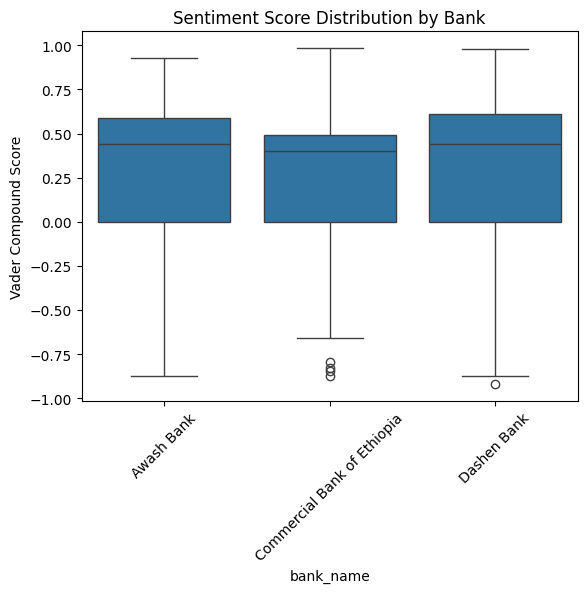

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x='bank_name', y='vader_compound')
plt.title('Sentiment Score Distribution by Bank')
plt.ylabel('Vader Compound Score')
plt.xticks(rotation=45)
plt.show()


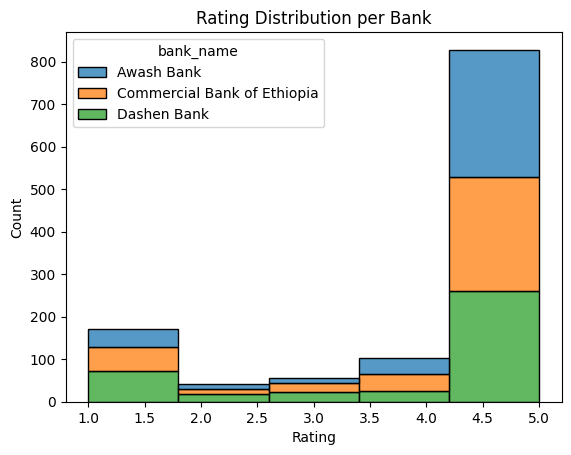

In [5]:
sns.histplot(data=df, x='rating', hue='bank_name', multiple='stack', bins=5)
plt.title('Rating Distribution per Bank')
plt.xlabel('Rating')
plt.show()
